In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import feature_engine.imputation as imp
from feature_engine.encoding import OneHotEncoder

import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("Xtrain_feature_sel_low_tol.csv")
X_test = pd.read_csv("Xtest_feature_sel_low_tol.csv")
ytrain = pd.read_csv("ytrain_mod.csv")
ytest = pd.read_csv("ytest_mod.csv")
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(ytrain.shape))
print("Shape of y Test: {}".format(ytest.shape))

Shape of X Train: (8672, 19)
Shape of X Test: (2168, 19)
Shape of y Train: (8672, 1)
Shape of y Test: (2168, 1)


In [3]:
# types of the variables
X_train.dtypes

Reviews                    float64
Rating                     float64
days_since_update          float64
Price                      float64
Category_FAMILY              int64
Category_GAME                int64
Category_Rare                int64
Category_TOOLS               int64
Size_Varies with device      int64
Size_0.1-10MB                int64
Size_10.1-20MB               int64
Size_30.1-40MB               int64
Size_20.1-30MB               int64
Type_Free                    int64
Content Rating_Everyone      int64
Content Rating_Teen          int64
Genres_Entertainment         int64
Genres_Rare                  int64
Genres_Education             int64
dtype: object

In [4]:
variable = "Size_Varies with device"

# create linear regression
regr = linear_model.LinearRegression()
# train model using training set
reg = regr.fit(X_train[[variable]],ytrain)

In [5]:
# regression coefficients
print('Coefficients: ', reg.coef_)
# intercept
print('intercept: ', reg.intercept_)

Coefficients:  [[55273727.54366109]]
intercept:  [7093261.27724535]


Text(0, 0.5, 'Installs')

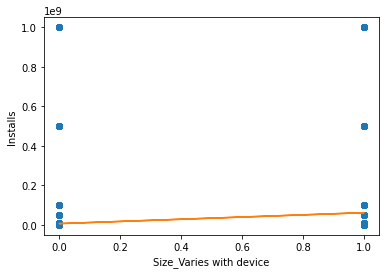

In [6]:
plt.plot(X_train[[variable]],ytrain,'o')
plt.plot(X_train[[variable]],reg.coef_*X_train[[variable]]+reg.intercept_)

plt.xlabel(X_train[[variable]].columns[0])
plt.ylabel("Installs")

# go through all variables

In [14]:
def lin_reg(variable):
    
    # create linear regression
    regr = linear_model.LinearRegression()
    # train model using training set
    reg = regr.fit(X_train[[variable]],ytrain)

    plt.plot(X_train[[variable]],ytrain,'o')
    plt.plot(X_train[[variable]],reg.coef_*X_train[[variable]]+reg.intercept_)

    plt.xlabel(X_train[[variable]].columns[0])
    plt.ylabel("Installs")
    
    #plt.savefig('plot.jpg' + variable, format='jpg')
    
    return [reg.coef_, reg.intercept_]

In [10]:
column_names = X_train.columns.tolist()
column_names

['Reviews',
 'Rating',
 'days_since_update',
 'Price',
 'Category_FAMILY',
 'Category_GAME',
 'Category_Rare',
 'Category_TOOLS',
 'Size_Varies with device',
 'Size_0.1-10MB',
 'Size_10.1-20MB',
 'Size_30.1-40MB',
 'Size_20.1-30MB',
 'Type_Free',
 'Content Rating_Everyone',
 'Content Rating_Teen',
 'Genres_Entertainment',
 'Genres_Rare',
 'Genres_Education']

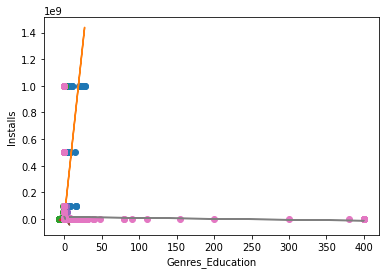

In [20]:
lin_reg_analysis = pd.DataFrame(columns=['variable', 'coefficients', 'intercept'])

for column_name in column_names:
    lin_reg_list = lin_reg(column_name)
    lin_reg_analysis.loc[len(lin_reg_analysis)] = [column_name, lin_reg_list[0][0][0], lin_reg_list[1][0]]


In [22]:
lin_reg_analysis.sort_values("coefficients")

,variable,coefficients,intercept
9,Size_0.1-10MB,-2.320462e+07,2.451705e+07
18,Genres_Education,-1.561648e+07,1.663020e+07
6,Category_Rare,-1.524437e+07,1.674608e+07
4,Category_FAMILY,-1.279169e+07,1.814766e+07
12,Size_20.1-30MB,-1.214223e+07,1.714140e+07
17,Genres_Rare,-1.106786e+07,1.752285e+07
14,Content Rating_Everyone,-1.082337e+07,2.449181e+07
2,days_since_update,-8.727139e+06,1.581264e+07
10,Size_10.1-20MB,-8.311738e+06,1.711518e+07
16,Genres_Entertainment,-7.068245e+06,1.623403e+07


In [24]:
lin_reg_analysis.to_csv("lin_reg_analysis_low_tol",index=False)